# cmip Impacts by Event Type

This file makes lots of contour plots for rainfall and temperature anomalies under different individal and compound event types



In [1]:
#import my functions
import utils._modelDefinitions as _model
%run helpers/impactPlots.ipynb


In [2]:
import xarray
import numpy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


In [3]:
indexSet='ecCombinedDmiSam'
resultsDir='figures/cmipCompoundImpact'+indexSet.capitalize()+'/'

# Import Data

Import events

In [4]:
allCompounds=xarray.open_dataset('results/cmip6Compounds.nc').sel(experiment='ssp585',drop=True)

Import seasonal impacts

In [5]:
meanXr=xarray.load_dataset('results/cmip6PrTsMeans.nc')

In [6]:
impactXr=xarray.concat(
    [xarray.open_dataset(
                'results/cmipSeasonPrTs/'+iModel+'ssp585.nc'
    ).sel(year=range(1850,2099)) for iModel in _model.scenarioMip[:,1]],
    'model', 
    coords='minimal', 
    compat='override'
).drop('height')

In [7]:
# rainfall is as a percentage of the annual average by cool/warm season

prXr=xarray.Dataset()
prXr['Winter Rain']=(impactXr.prWinter/(meanXr['prWinter']+meanXr['prSummer'])*100)
prXr['Summer Rain']=(impactXr.prSummer/(meanXr['prWinter']+meanXr['prSummer'])*100)

tsXr=(impactXr[['tsWinter','tsSummer']])
tsXr=tsXr.rename({'tsWinter':'Winter Temp','tsSummer':'Summer Temp'})

In [8]:
#temperature gets detrended
trendXr=tsXr.rolling(year=11,min_periods=5,center=True).mean('year')
detrendTsXr=(tsXr-trendXr)

# Define Event Types

#Everything
everythingXr=(compoundsXr.nEvents<5)
everythingXr.name='everything'

#The no firePos event
noEventXr=(compoundsXr.nEvents==0)
noEventXr.name='noFirePos'

#the absence of events
nothingXr=noEventXr.all('fire')
nothingXr.name='no'

#The single index only event
singleEventsXr=(compoundsXr[['enso','iod','sam']]==True)

#The compound events
compoundEventsXr=(compoundsXr[[*allCompounds.pairs, 'all3']]==True)

#Put all those events in one xr
maskXr=xarray.merge([everythingXr, nothingXr, noEventXr,
                     singleEventsXr, compoundEventsXr])

In [10]:
#List of events to plot
eventsList=[#'everything','no',# 'noFirePos', 
            #'enso','iod','sam', 
            *allCompounds.pairs, 'all3']

In [11]:
eventsList

['enso+iod', 'enso+sam', 'iod+sam', 'all3']

# Impact plots for compounds events

Fire:pos
winter


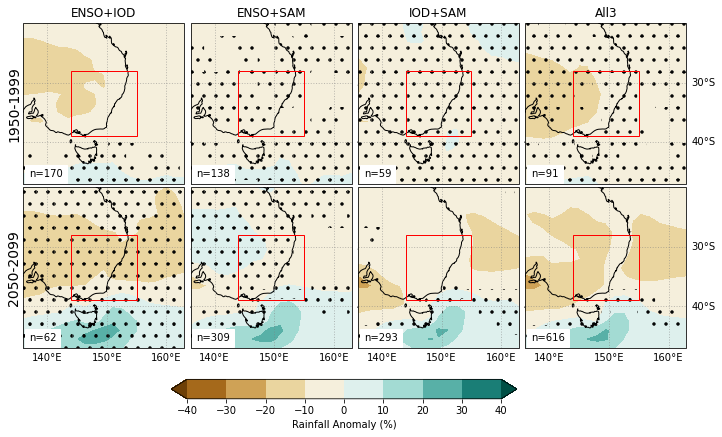

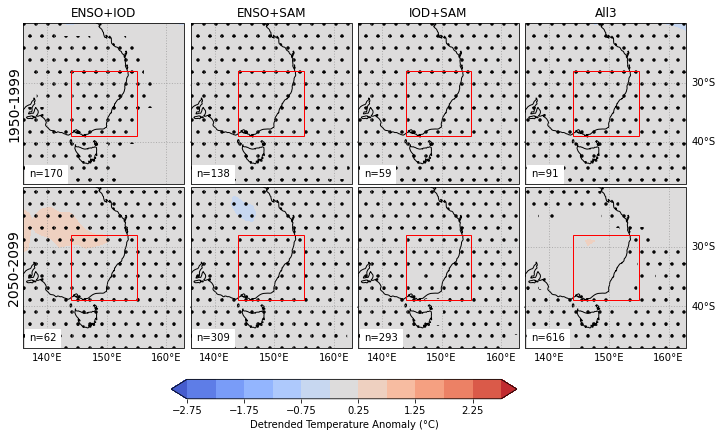

summer


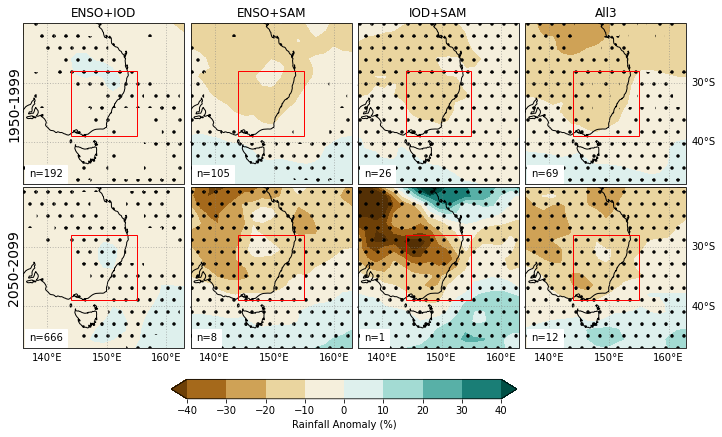

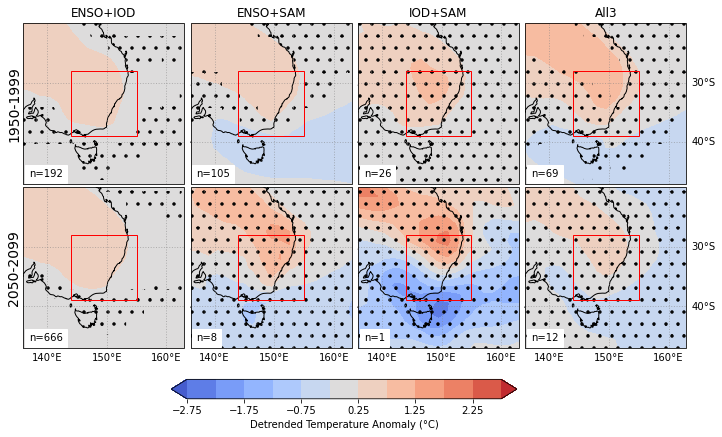

Fire:neg
winter


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


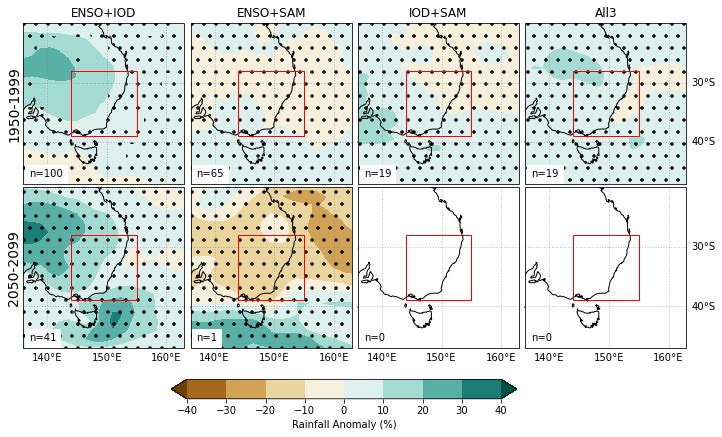

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


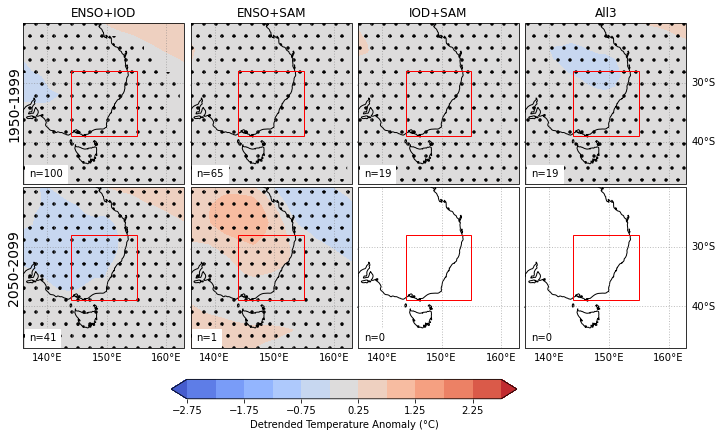

summer


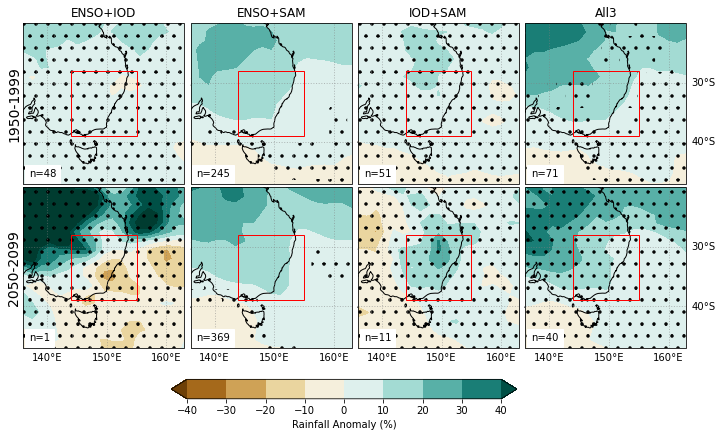

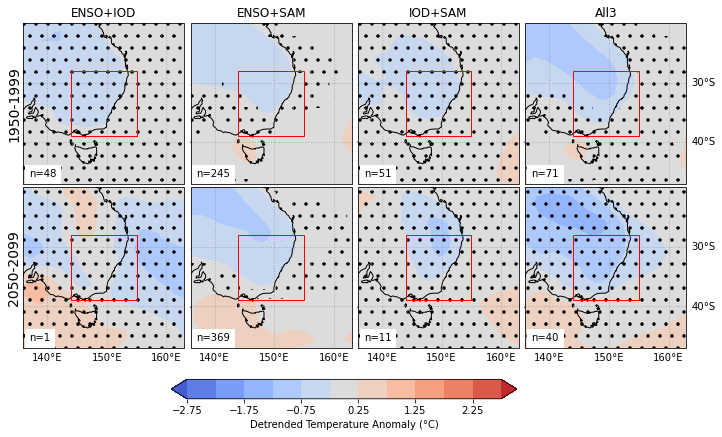

In [22]:
%run helpers/impactPlots.ipynb
for iFire in ['pos','neg']:
    print('Fire:'+iFire)
    for iSeason in ['winter','summer']:
        print(iSeason)
        axs=multiPlotter(
            prXr[iSeason.capitalize()+' Rain'], #sourceData
            allCompounds[indexSet+iSeason].to_dataset('compound').sel(fire=iFire, drop=True), #masks for event types
            eventsList, #names of event types
            cbarLabel='Rainfall Anomaly (%)'
        )
        axs[0].set_title('ENSO+IOD')
        axs[1].set_title('ENSO+SAM')
        axs[2].set_title('IOD+SAM')
        axs[3].set_title('All3')
        plt.savefig(
            'figures/impactPlots/'
            +iFire
            +iSeason.capitalize()
            +indexSet.capitalize()
            +'Rain.pdf',
            bbox_inches='tight'
        )
        plt.show()
        
        axs=multiPlotter(
            detrendTsXr[iSeason.capitalize()+' Temp'],
            allCompounds[indexSet+iSeason].to_dataset('compound').sel(fire=iFire, drop=True), 
            eventsList,
            cbarLabel='Detrended Temperature Anomaly (°C)'
        )
        axs[0].set_title('ENSO+IOD')
        axs[1].set_title('ENSO+SAM')
        axs[2].set_title('IOD+SAM')
        axs[3].set_title('All3')
        plt.savefig(
            'figures/impactPlots/'+iFire+iSeason.capitalize()+indexSet.capitalize()+'Temp.pdf',
            bbox_inches='tight'
        )
        plt.show()

# Now pair them by how the frequencies change

In [ ]:
%run helpers/impactPlots.ipynb

In [12]:
firstRow.sel

<xarray.DataArray 'ecCombinedDmiSamwinter' (compound: 9, model: 37, year: 50)>
array([[[1., 0., ..., 0., 1.],
        [1., 2., ..., 3., 2.],
        ...,
        [3., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 1., 0.],
        ...,
        [1., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       ...,

       [[1., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 1., 1.],
        [1., 1., ..., 1., 1.]],

       [[0., 0., ..., 0., 0.],
        [0., 1., ..., 1., 1.],
        ...,
        [1., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]])
Coordinates:
  * year      (year) int64 1950 1951 1952 1953 1954 ... 1995 1996 1997 1998 1999
  * model     (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * compound  (compound) object 'nEvents' 'all3' ... 'sam' 'anyCompound'
Attributes:
    indexNames:  ['ecCombined', 'dmi', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

In [14]:
toPlot

<xarray.Dataset>
Dimensions:      (lat: 34, lon: 47, model: 37)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * lon          (lon) float64 100.0 101.5 103.0 104.5 ... 166.0 167.5 169.0
  * lat          (lat) float64 -50.0 -48.5 -47.0 -45.5 ... -5.0 -3.5 -2.0 -0.5
Data variables:
    Winter Rain  (model, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    Summer Rain  (model, lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [83]:
def singleRainfallAnomWithStipling(da, iComp, iSeason):
    
    season=iSeason.capitalize() + ' Rain'
    
    plotCond = da.sel(compound=iComp,drop=True)
    toPlot = prXr[season].where(plotCond).mean(['year'])
    cs=plotAnom(toPlot.mean('model'), ax)
    plotStipling(toPlot,ax)

    plt.xlim([136,163])
    plt.ylim([-47,-20])

    #This is the number of events. Because dataset is well-curated, we can use the count from one position to be the count for everything
    nEvents=(
        prXr[season].where(plotCond).isel(lon=17,lat=15).count()
        /(50*37)
        *100
    ).values
    ax.text(
        0.035,0.045,
        "n="+f'{nEvents:.0f}'+'%', 
        transform=ax.transAxes, 
        backgroundcolor='white',
        zorder=2
    )


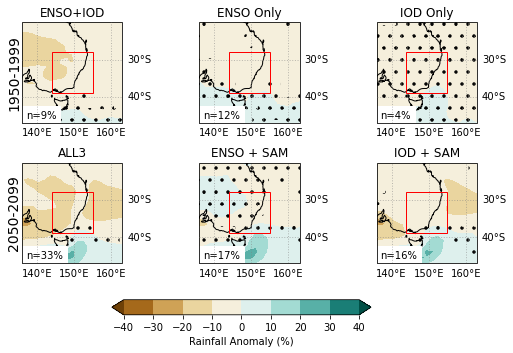

In [92]:
import matplotlib.cm as cm
import matplotlib.colorbar as cb

nRows=2
nCols=3

fig=plt.figure(figsize=(nCols*3,nRows*3+1))

#First row is years 1950 to 1999
with allCompounds[indexSet+'winter'].sel(year=slice(1950,1999),fire='pos',drop=True) as firstRow:

    #First cell is ENSO+IOD
    ax=plt.subplot(nRows+1,nCols,1,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(firstRow,'enso+iod','winter')
    ax.set_title('ENSO+IOD')

    #in the first column, put a y-label
    ax.text(
        -0.15, 0.5,  #xy relative to bottom left of axis
        str('1950-1999'), #yearRange
        rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
    )

    #2nd cell is ENSO only
    ax=plt.subplot(3,3,2,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(firstRow,'enso','winter')
    ax.set_title('ENSO Only')

    #3rd cell is IOD only
    ax=plt.subplot(3,3,3,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(firstRow,'iod','winter')
    ax.set_title('IOD Only')

    #4th cell is SAM only
    #ax=plt.subplot(3,4,4,projection=ccrs.PlateCarree())
    #singleRainfallAnomWithStipling(firstRow,'sam','winter')
    #ax.set_title('SAM Only')

#Second row is years 2050 to 2099
with allCompounds[indexSet+'winter'].sel(year=slice(2050,2099),fire='pos',drop=True) as secondRow:
    #First cell is All3
    ax=plt.subplot(3,3,4,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(secondRow,'all3','winter')
    ax.set_title('ALL3')

    #in the first column, put a y-label
    ax.text(
        -0.15, 0.5,  #xy relative to bottom left of axis
        str('2050-2099'), #yearRange
        rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
    )
    
    #2nd cell is ENSO + SAM only
    ax=plt.subplot(3,3,5,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(secondRow,'enso+sam','winter')
    ax.set_title('ENSO + SAM')

    #3rd cell is IOD only
    ax=plt.subplot(3,3,6,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(secondRow,'iod+sam','winter')
    ax.set_title('IOD + SAM')

    #4th cell is SAM only
    #ax=plt.subplot(3,4,8,projection=ccrs.PlateCarree())
    #singleRainfallAnomWithStipling(secondRow,'sam','winter')
    #ax.set_title('SAM Only')

# add some space between rows
plt.subplots_adjust(hspace=0.4)

#put a color bar on
ax=fig.add_axes([0.3,0.3,0.4,0.03])
cbar=plt.colorbar(
    cm.ScalarMappable(cs.norm,cs.cmap),
    orientation='horizontal', 
    cax=ax, 
    extend='both', 
    boundaries=cs.get_array(), 
    label = 'Rainfall Anomaly (%)'
)

plt.savefig('figures/curatedImpactPlots/cmipDryWinterRainfall.pdf')

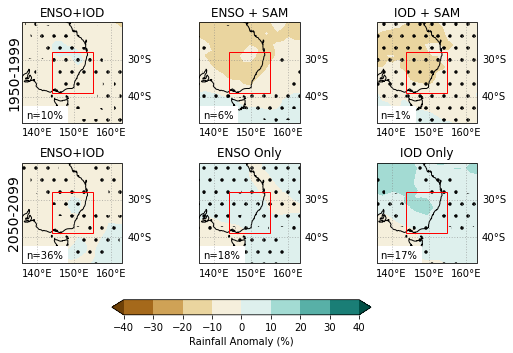

In [95]:
import matplotlib.cm as cm
import matplotlib.colorbar as cb
nRows=2
nCols=3
fig=plt.figure(figsize=(nCols*3,nRows*3+1))

#First row is years 1950 to 1999
with allCompounds[indexSet+'summer'].sel(year=slice(1950,1999),fire='pos',drop=True) as firstRow:

    #First cell is ENSO+IOD
    ax=plt.subplot(nRows+1,nCols,1,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(firstRow,'enso+iod','summer')
    ax.set_title('ENSO+IOD')

    #in the first column, put a y-label
    ax.text(
        -0.15, 0.5,  #xy relative to bottom left of axis
        str('1950-1999'), #yearRange
        rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
    )

    #2nd cell is ENSO only
    ax=plt.subplot(nRows+1,nCols,2,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(firstRow,'enso+sam','summer')
    ax.set_title('ENSO + SAM')

    #3rd cell is IOD only
    ax=plt.subplot(nRows+1,nCols,3,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(firstRow,'iod+sam','summer')
    ax.set_title('IOD + SAM')

    #4th cell is SAM only
    #ax=plt.subplot(3,4,4,projection=ccrs.PlateCarree())
    #singleRainfallAnomWithStipling(firstRow,'sam','summer')
    #ax.set_title('SAM Only')

#Second row is years 2050 to 2099
with allCompounds[indexSet+'summer'].sel(year=slice(2050,2099),fire='pos',drop=True) as secondRow:
    #First cell is All3
    ax=plt.subplot(nRows+1,nCols,nCols+1,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(secondRow,'enso+iod','summer')
    ax.set_title('ENSO+IOD')

    #in the first column, put a y-label
    ax.text(
        -0.15, 0.5,  #xy relative to bottom left of axis
        str('2050-2099'), #yearRange
        rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
    )
    
    #2nd cell is ENSO + SAM only
    ax=plt.subplot(nRows+1,nCols,nCols+2,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(secondRow,'enso','summer')
    ax.set_title('ENSO Only')

    #3rd cell is IOD only
    ax=plt.subplot(nRows+1,nCols,nCols+3,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(secondRow,'iod','summer')
    ax.set_title('IOD Only')

    #4th cell is SAM only
    #ax=plt.subplot(3,4,8,projection=ccrs.PlateCarree())
    #singleRainfallAnomWithStipling(secondRow,'sam','summer')
    #ax.set_title('SAM Only')

# add some space between rows
plt.subplots_adjust(hspace=0.4)

#put a color bar on
ax=fig.add_axes([0.3,0.3,0.4,0.03])
cbar=plt.colorbar(
    cm.ScalarMappable(cs.norm,cs.cmap),
    orientation='horizontal', 
    cax=ax, 
    extend='both', 
    boundaries=cs.get_array(), 
    label = 'Rainfall Anomaly (%)'
)

plt.savefig('figures/curatedImpactPlots/cmipDrySummerRainfall.pdf')

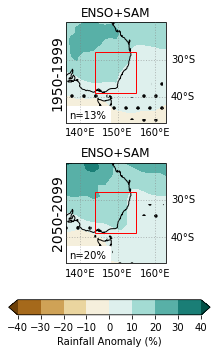

In [86]:
import matplotlib.cm as cm
import matplotlib.colorbar as cb

fig=plt.figure(figsize=(7,7))

#First row is years 1950 to 1999
with allCompounds[indexSet+'summer'].sel(year=slice(1950,1999),fire='neg',drop=True) as firstRow:

    ax=plt.subplot(3,1,1,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(firstRow,'enso+sam','summer')
    ax.set_title('ENSO+SAM')

    #in the first column, put a y-label
    ax.text(
        -0.15, 0.5,  #xy relative to bottom left of axis
        str('1950-1999'), #yearRange
        rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
    )

#Second row is years 2050 to 2099
with allCompounds[indexSet+'summer'].sel(year=slice(2050,2099),fire='neg',drop=True) as secondRow:
    #First cell is All3
    ax=plt.subplot(3,1,2,projection=ccrs.PlateCarree())
    singleRainfallAnomWithStipling(secondRow,'enso+sam','summer')
    ax.set_title('ENSO+SAM')

    #in the first column, put a y-label
    ax.text(
        -0.15, 0.5,  #xy relative to bottom left of axis
        str('2050-2099'), #yearRange
        rotation='vertical', transform=ax.transAxes, verticalalignment='center',fontsize=14
    )
    

# add some space between rows
plt.subplots_adjust(hspace=0.4)

#put a color bar on
ax=fig.add_axes([0.3,0.3,0.4,0.03])
cbar=plt.colorbar(
    cm.ScalarMappable(cs.norm,cs.cmap),
    orientation='horizontal', 
    cax=ax, 
    extend='both', 
    boundaries=cs.get_array(), 
    label = 'Rainfall Anomaly (%)'
)

plt.savefig('figures/curatedImpactPlots/cmipWetSummerRainfall.pdf')